Tutorial from https://www.youtube.com/watch?v=jztwpsIzEGc&t=8s,https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb

# 1. Setup

In [ ]:
# Install Dependencies
!pip install tensorflow tensorflow-gpu opencv-python matplotlib
!pip list

In [1]:
# Imports
import tensorflow as tf
import os

2023-08-30 14:05:15.104832: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-30 14:05:15.139184: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 14:05:21.683173: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')

2023-08-30 14:05:35.107135: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2023-08-30 14:05:35.139183: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-30 14:05:35.139287: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


# 2. Prepare images

In [3]:
# Imports
import cv2
import imghdr

/tmp/ipykernel_1342251/3861516896.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = 'data/UoA-DR/' # IMAGES DOWNLOADED FROM https://figshare.com/s/5011cb600c8bdbc941f1?file=10741045

classes_dict = {  #  X and Y pairs outlined in https://figshare.com/s/5011cb600c8bdbc941f1?file=10910012
    "NPDR": {*range(1, 82), *range(83, 95), 130, *range(132, 144), *range(168, 170), *range(171, 175), 179, 193},
    "PDR": {82, *range(95, 101), 131, 167, *range(176, 179), *range(182, 193), *range(194, 201)},
    "Healthy": {*range(101, 130), *range(144, 167), 170, 175, *range(180, 182)}
}

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        print(image_path)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

print(img.shape)

data/UoA-DR/Healthy/147.jpg
Issue with image data/UoA-DR/Healthy/147.jpg
data/UoA-DR/Healthy/127.jpg
Issue with image data/UoA-DR/Healthy/127.jpg
data/UoA-DR/Healthy/102.jpg
Issue with image data/UoA-DR/Healthy/102.jpg
data/UoA-DR/Healthy/110.jpg
Issue with image data/UoA-DR/Healthy/110.jpg
data/UoA-DR/Healthy/166.jpg
Issue with image data/UoA-DR/Healthy/166.jpg
data/UoA-DR/Healthy/108.jpg
Issue with image data/UoA-DR/Healthy/108.jpg
data/UoA-DR/Healthy/163.jpg
Issue with image data/UoA-DR/Healthy/163.jpg
data/UoA-DR/Healthy/170.jpg
Issue with image data/UoA-DR/Healthy/170.jpg
data/UoA-DR/Healthy/148.jpg
Issue with image data/UoA-DR/Healthy/148.jpg
data/UoA-DR/Healthy/145.jpg
Issue with image data/UoA-DR/Healthy/145.jpg
data/UoA-DR/Healthy/161.jpg
Issue with image data/UoA-DR/Healthy/161.jpg
data/UoA-DR/Healthy/181.jpg
Issue with image data/UoA-DR/Healthy/181.jpg
data/UoA-DR/Healthy/175.jpg
Issue with image data/UoA-DR/Healthy/175.jpg
data/UoA-DR/Healthy/103.jpg
Issue with image data/U

# 3. Load Data

In [5]:
# Imports
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, labels='inferred') #TODO check if any data was loss, as it says 199 files instead of 200
data_iterator = data.as_numpy_iterator() # convert to an iterator as the data is a a generator 
batch = data_iterator.next() # contains X INPUT and Y EXPECTED OUTPUTS
x, y = batch

#--- DEBUGGING ---#

print("\nx.shape is: ", x.shape) # X INPUT, batch of 32 images of size 256*256 in 3 dimsension colour
print("y is: ", y) # Y OUTPUT, batch of 32 labels. 

print("There are ", len(data.file_paths), "data.file_paths, which are")
data.file_paths # demonstrating how the image classes from the list of file_paths does not match y

#--- ENDS HERE ---#

Found 199 files belonging to 3 classes.



x.shape is:  (32, 256, 256, 3)
y is:  [1 1 0 0 1 2 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 2 1 1 1 1 2 1 1]
There are  199 data.file_paths, which are


['data/UoA-DR/NPDR/28.jpg',
 'data/UoA-DR/NPDR/21.jpg',
 'data/UoA-DR/Healthy/125.jpg',
 'data/UoA-DR/NPDR/20.jpg',
 'data/UoA-DR/NPDR/43.jpg',
 'data/UoA-DR/Healthy/121.jpg',
 'data/UoA-DR/NPDR/55.jpg',
 'data/UoA-DR/Healthy/152.jpg',
 'data/UoA-DR/NPDR/68.jpg',
 'data/UoA-DR/Healthy/151.jpg',
 'data/UoA-DR/NPDR/130.jpg',
 'data/UoA-DR/Healthy/102.jpg',
 'data/UoA-DR/PDR/198.jpg',
 'data/UoA-DR/Healthy/124.jpg',
 'data/UoA-DR/PDR/100.jpg',
 'data/UoA-DR/Healthy/128.jpg',
 'data/UoA-DR/NPDR/84.jpg',
 'data/UoA-DR/NPDR/49.jpg',
 'data/UoA-DR/NPDR/8.jpg',
 'data/UoA-DR/NPDR/70.jpg',
 'data/UoA-DR/Healthy/126.jpg',
 'data/UoA-DR/NPDR/47.jpg',
 'data/UoA-DR/PDR/167.jpg',
 'data/UoA-DR/NPDR/140.jpg',
 'data/UoA-DR/PDR/186.jpg',
 'data/UoA-DR/NPDR/85.jpg',
 'data/UoA-DR/NPDR/24.jpg',
 'data/UoA-DR/NPDR/141.jpg',
 'data/UoA-DR/Healthy/114.jpg',
 'data/UoA-DR/Healthy/148.jpg',
 'data/UoA-DR/NPDR/3.jpg',
 'data/UoA-DR/NPDR/22.jpg',
 'data/UoA-DR/PDR/188.jpg',
 'data/UoA-DR/NPDR/78.jpg',
 'data/

['Healthy', 'NPDR', 'PDR']
[1 1 0 1 1 2 1 1 1 0 1 0 1 0 1 2 1 0 0 1 1 1 0 1 0 2 1 2 1 1 1 1]
Filename: data/UoA-DR/NPDR/20.jpg
Filename: data/UoA-DR/PDR/100.jpg
Filename: data/UoA-DR/NPDR/3.jpg
Filename: data/UoA-DR/PDR/200.jpg


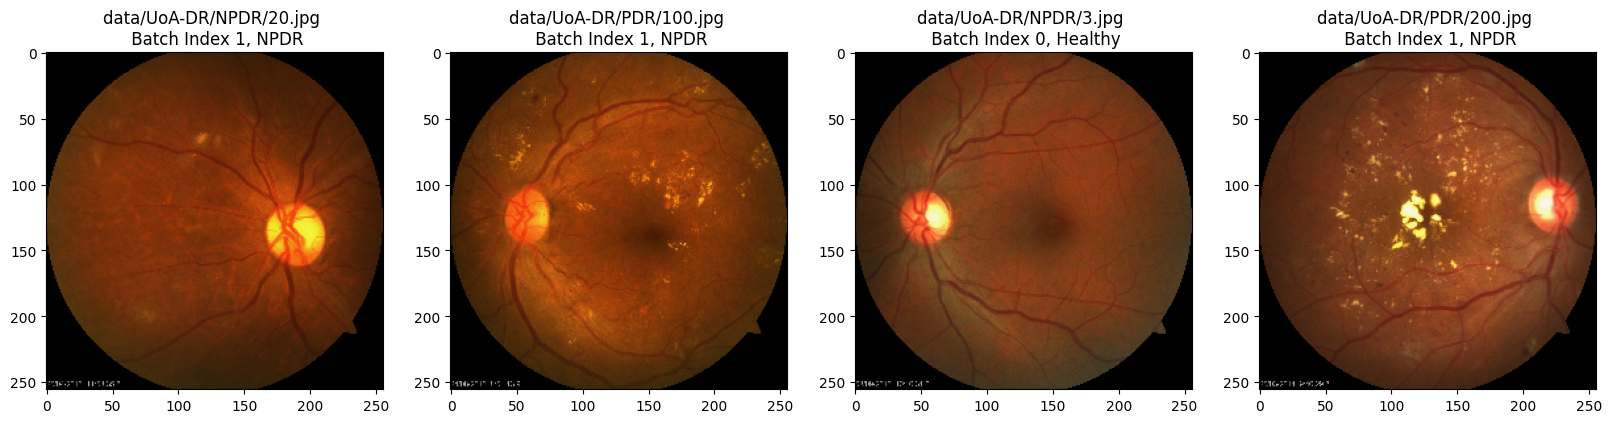

In [144]:
class_labels = data.class_names  # Get the class labels
print(class_labels)
print(y)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))

    y_index = y[idx]
    image_class = class_labels[y_index]
    # image_filename = os.path.basename(data.file_paths[y_index])
    # file_path = os.path.join(data_dir, image_class, image_filename)
    # print("File Path:", file_path)

    # Get the filename using the index and dataset's file_paths attribute
    filename = data.file_paths[idx]
    print("Filename:", filename)

    # Set the title with class label and batch index
    title = f"{filename} \n Batch Index {y_index}, {image_class}"
    ax[idx].set_title(title)



plt.show()

['Healthy', 'NPDR', 'PDR']


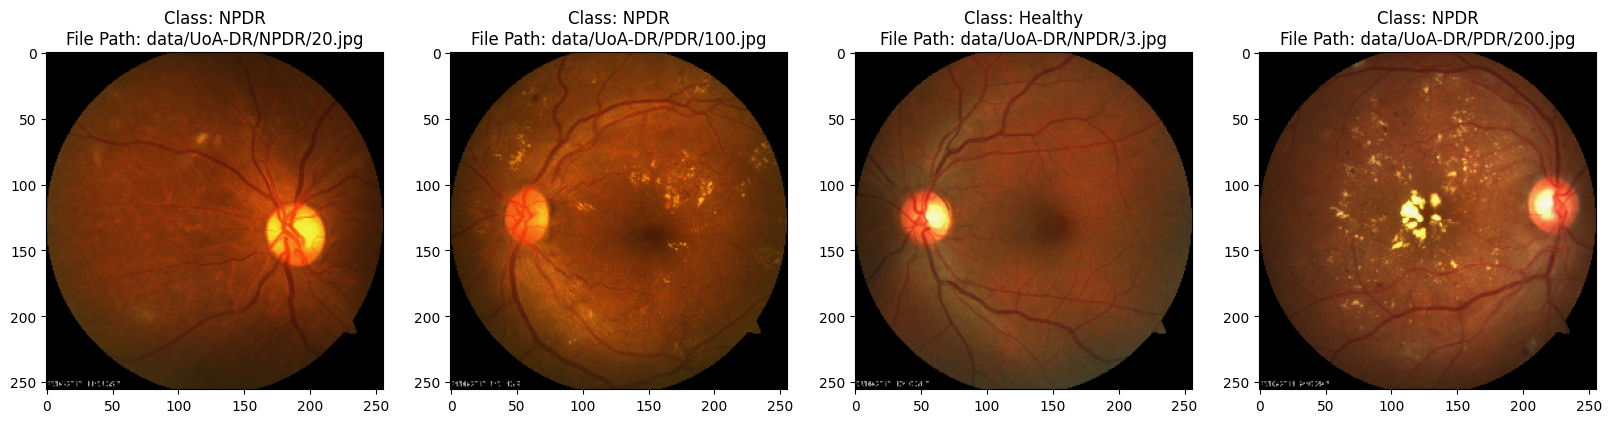

In [149]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

print(class_labels)

for idx, img in enumerate(batch[0][:4]):
    class_index = batch[1][idx]
    class_name = class_labels[class_index]  # Get the class name from class_labels

    image_filename = os.path.basename(data.file_paths[idx])
    file_path = data.file_paths[idx]

    ax[idx].imshow(img.astype(int))
    ax[idx].set_title(f"Class: {class_name}\nFile Path: {file_path}")

plt.show()


0
1
2
3


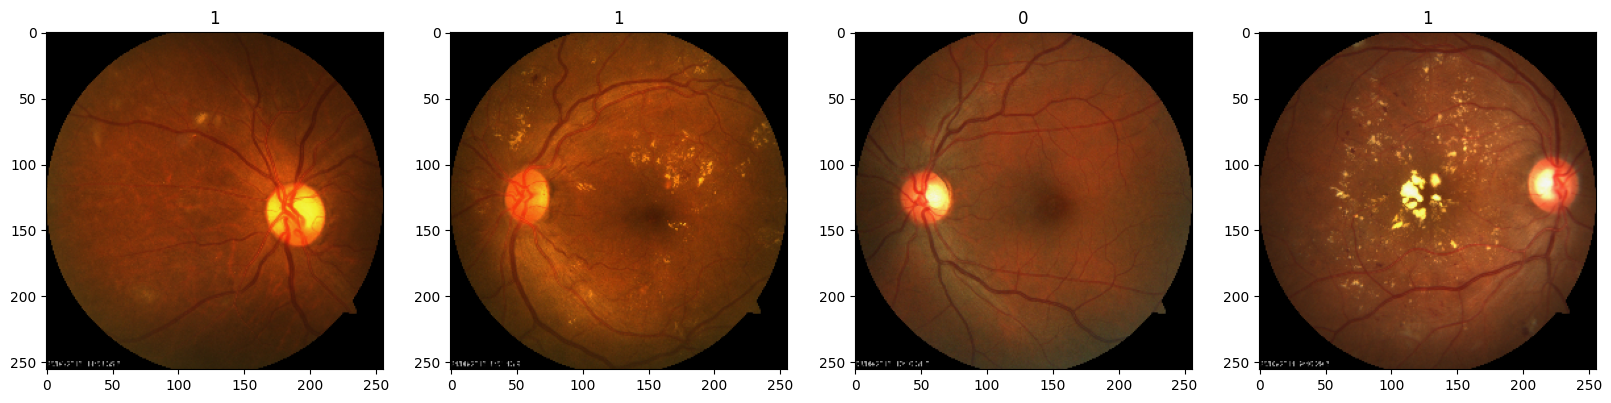

In [145]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    print(idx)
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [164]:
scaled = x/255
print(scaled.max())
print(scaled.min())

mapped = data.map(lambda x, y: (x/255, y)).as_numpy_iterator().next()
print(mapped[0])
print(mapped[1])

0.99707556
0.0
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.01537894 0.01537894 0.01537894]
   [0.06817698 0.06817698 0.06817698]
   [0.00618873 0.00618873 0.00618873]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.00249885 0.00249885 0.00

In [165]:
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [173]:
batch[0].min()

0.0

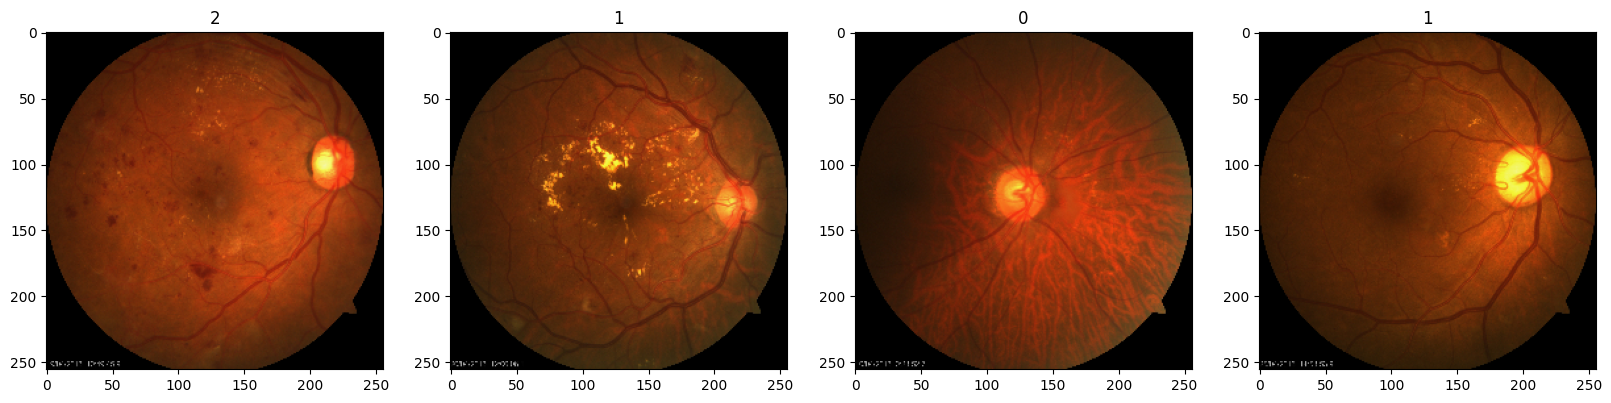

In [174]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [181]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1

# TODO maybe make separate folders for each class: https://www.youtube.com/watch?v=VCHNh3cMsRE 
# TODO make make more data 

In [183]:
print(train_size, val_size, test_size)
print(train_size + val_size + test_size == len(data))

4 2 1
True


In [184]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [46]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [185]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [258]:


model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256,256,3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 conv2d_40 (Conv2D)          (None, 58, 58, 64)       

In [236]:
# model = Sequential() # TODO update to ResNet

# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())

# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())

# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())

# model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# model.summary()

In [259]:
# model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])
     

# 7. Train

In [260]:
logdir='logs'

In [261]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [265]:
print(y) 

[1 1 1 1 1 0 1]


In [293]:
print(len(train))
x_train, y_train, _, _ = train
print(x_train[1])
y_train_labels = y_train[1]
print(y_train_labels)

print(len(val))
x_val, y_val = val
y_val_labels = y_val[1]
print(y_val_labels)


4
tf.Tensor([0 1 2 1 1 0 1 0 1 1 1 2 2 0 0 1 1 1 1 1 1 0 1 2 1 2 2 1 1 1 1 1], shape=(32,), dtype=int32)
tf.Tensor([0 2 0 2 2 1 1 1 1 1 0 0 0 1 1 0 1 2 1 1 1 0 1 0 1 1 1 1 0 1 0 2], shape=(32,), dtype=int32)
2
tf.Tensor([1 1 0 2 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0], shape=(32,), dtype=int32)


In [289]:
# train_datagen = ImageDataGenerator(rescale = 1/255.0,
#                                    rotation_range=30,
#                                    zoom_range=0.4,
#                                    horizontal_flip=True)
                                   
# train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
#                                                     batch_size=batch_size,
#                                                     class_mode='categorical',
#                                                     target_size=(256, 256))
     


# history = model.fit(train,
#                     epochs=30,
#                     validation_data=val,
#                     callbacks = [tensorboard_callback]
#                     )

from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train_labels, num_classes=3)
y_val_encoded = to_categorical(y_val_labels, num_classes=3)

history = model.fit(x_train, y_train_encoded,  # Use the one-hot encoded labels
                    epochs=30,
                    validation_data=(x_val, y_val_encoded),  # Use the one-hot encoded labels
                    callbacks=[tensorboard_callback])

Epoch 1/30


ValueError: in user code:

    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "sequential_6" expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(32, 256, 256, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(32,) dtype=int32>]


In [249]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50


ValueError: in user code:

    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 5) are incompatible


In [193]:
print("TensorFlow GPU available:", tf.test.is_gpu_available())


TensorFlow GPU available: True


2023-08-29 15:18:02.654048: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-29 15:18:02.654251: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-29 15:18:02.654300: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# 8. Plot Performance

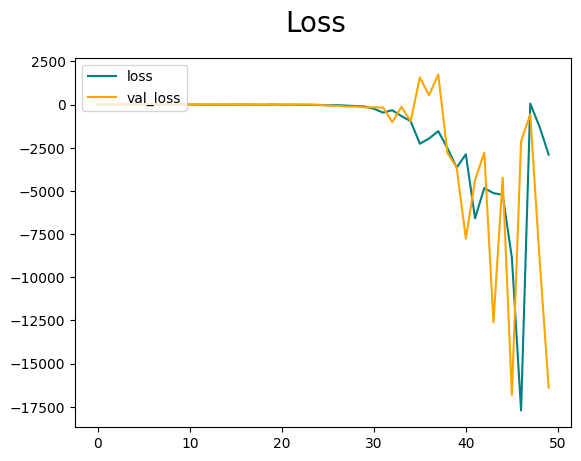

In [194]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

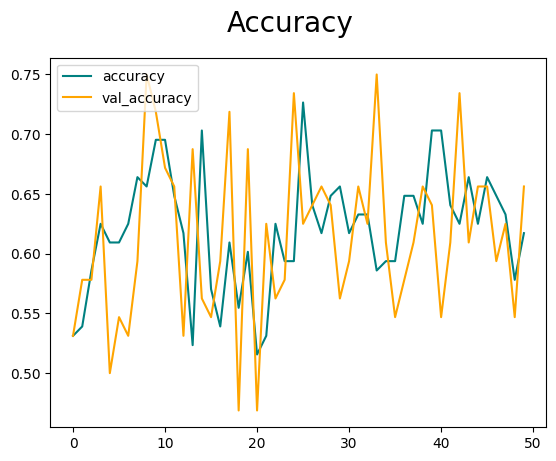

In [195]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [196]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [197]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [198]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 99ms/step


In [201]:
print(pre.result(), re.result(), acc.result())

print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

tf.Tensor(0.85714287, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.85714287, shape=(), dtype=float32)
Precision: 0.8571428656578064, Recall: 1.0, Accuracy: 0.8571428656578064


# 10. Test

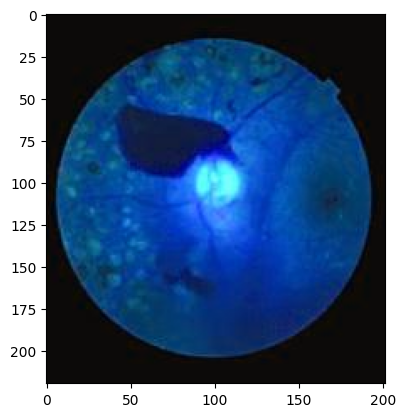

In [225]:
img = cv2.imread('./PDR.jpg')
plt.imshow(img)
plt.show()

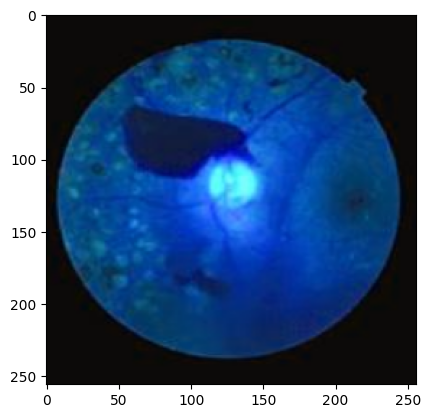

In [226]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [227]:
print(resize.shape)
print(np.expand_dims(resize, 0).shape) # demostration of adding an extra dimension
yhat = model.predict(np.expand_dims(resize/255, 0))

(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 11ms/step


In [228]:
yhat

array([[0.5127991]], dtype=float32)

In [67]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [229]:
from tensorflow.keras.models import load_model

In [230]:
model.save(os.path.join('models','imageclassifier.h5'))

/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [231]:
new_model = load_model('./models/imageclassifier.h5')

In [232]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 66ms/step


array([[0.5127991]], dtype=float32)